## Introducimos las librerias que ocupamos para poder utilizar el csv

In [37]:
# coding=utf-8
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from IPython.display import display
import pandas as pd
import csv



In [4]:
db = pd.read_csv("db.csv", names=["twittero", "tweett"] )

display( db.head(20) )


,twittero,tweett
0,RamonLucero6,"RT @Pepe_Avila6: 43 desaparecidos hicieron renunciar a un gobernador, 49 inocentes hicieron gobe..."
1,RamonLucero6,"RT @vigiadeltrans: la ley se cumple,,,no se interpreta,,,que alguien le diga porfa a FEMOT y @Da..."
2,RafaelVidalP,RT @Neomexicanismos: En México la muerte es cultura viva #DiaDeMuertosMexico https://t.co/vkvrFm...
3,RafaelVidalP,RT @GuysPictures: Crackheads are mystical beings I swear https://t.co/XsYbaqpOdI
4,RafaelVidalP,RT @GuysPictures: When you're at a party and you see your friend getting it with his crush http...
5,RafaelVidalP,RT @alexandra_cra: No sales de mi mente
6,RafaelVidalP,RT @RoyCampos: Así es https://t.co/7b2cXegaQs
7,RafaelVidalP,Esa imagen atemporal de ti...
8,RafaelVidalP,RT @NBA_Skits: Kyle Kuzma is just filthy. 🔥🌪\n\n https://t.co/w2wmSzyxYC
9,RafaelVidalP,RT @CauseWereGuys: talk about a dime https://t.co/KXBS7svFTi


## A continuación eliminaremos los textos vacios para evitar errores de y los sub-indices  que tienen valor numerico "nan" 

In [67]:
import re
from bs4 import BeautifulSoup

listTweett = db["tweett"].tolist()

for (i, tweett) in enumerate(listTweett):
    if type( tweett ) != type("Prueba"):
        print( "listTweett[{}]: {} ".format(i, listTweett[i]) )
        del listTweett[i]


listTweett[11726]: nan 
listTweett[11727]: nan 
listTweett[11776]: nan 
listTweett[11805]: nan 
listTweett[36393]: nan 
listTweett[64412]: nan 
listTweett[67708]: nan 
listTweett[86197]: nan 
listTweett[86232]: nan 
listTweett[106714]: nan 
listTweett[126765]: nan 
listTweett[126767]: nan 
listTweett[159681]: nan 
listTweett[196068]: nan 
listTweett[277538]: nan 


# Limpieza

 Para generar una limpieza mas profunda tomaremos cada tweett y lo limpiaremos por separado primero se eliminaran los emojis de cada tweett, despues combertiremos todo a menisculas eliminaremos los email's. Como cada tweett puede tener una referencia o una respuesta a un twittero tambien nos aseguramos de eliminar las palabras que empiecen con un '@' esto significa que es un usuario de twitter lo mismo se hizo con los hashtag, con respecto a las letras con acentos son remplazadas con su caracter correspondiente, se usa la misma tectina con el mal uso de las apostrofes y el argot utilizando un diccionario para poder identificar cual le pertenece.


In [70]:
#51010
txt = open( "token.txt","w" )

for tweett in listTweett:
    text = str( tweett )
#text = listTweett[39186]
#print( text )

    # eliminar emojis
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)

    text = emoji_pattern.sub( r'', text ) 

    #----------eliminar mayusculas
    text = text.lower()

    #----------eliminamos email
    text = re.sub(r'[\w\.-]+@[\w\.-]+ ', "", text )
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))* ', '',  text )

    #----------eliminamos usuarios con arrobas @
    text = re.sub( r'@[a-zA-Z0-9]+[(,.:; )]', "", text )

    #----------eliminar hashtag
    text = re.sub( r'#.*: ', "", text )

    #----------eliminar links
    text = re.sub( r'http.*[$ ,:;.]', "", text )


    #----------eliminar los signos de puntuacion
    puncList = [".", ";", ":", "!", "?", "/", "\\", ",", ")", "(", "\""]
    for pun in puncList:
        if pun in text:
            text = text.replace( pun, '' )

    #----------eliminacion de apostrofe
    apostrofe = { "pa'el" : "para el'",
                   "pa'que" : "para que",
                   "pa'los" : "para los",
                   "pa'las" : "para las",
                   "pa’ca"  : "para acá" }

    palabras = text.split()
    for (i, palabra) in enumerate( palabras ) :
        if palabra in apostrofe:
            palabras[i] = apostrofe[palabra]

    text = " ".join(palabras)

    #eliminacion de argot
    slang = { "<3" : "corazon", "&":"y", "aka":"tambien conocido como", "asap": "tan pornto como sea posible", "ftf":"cara a cara",
            "lol": "reirse a carcajadas", "omg": "oh mi dios", "wtf": "que mierda", "wtb":"quiero comparlo", "btw":"por cierto", 
            "giyf": "google es tu amigo", "jic" : "por si acaso", "ily":"te quiero", "fyi": "para tu informacion", "hbd":"feliz cumpleaños",
            "wdyt": "que piensas", "ke":"que" }


    palabras = text.split()
    for (i, palabra) in enumerate( palabras ) :
        if palabra in slang:
            palabras[i] = slang[palabra]



    #eliminar acentos
    acentos = { "á":"a",  "é":"e", "í": "i", "ó":"o", "ú":"u" }
    for acento in acentos:
        for (i, palabra ) in enumerate( palabras ) :
            if acento in palabra:
                iAux = palabras.index(palabra)
                palabras[ iAux ] = palabra.replace( acento, acentos[acento] )

    text = " ".join( palabras )    

    #eliminacion de no alfabeticos
    palabras = re.sub("[^a-zA-Z]", " ", text).split()
    text = " ".join( palabras )

    txt.write( " "+text+" " )

#print( text )   
txt.close()

# Resultados

 una vez terminados el proceso graficamos los resultados, como era de esperarse las palabras mas comunes son "de", "la", "es", etc.
para evitar esto esliminaremos estas palabras de paro "stopwords", se hara lo mismo en las stopwords en ingles por aquello del espanglish.
 

Cantidad de palabras en el texto:  3090038

Palabras más populares:
 [('rt', 135093), ('que', 92210), ('de', 88255), ('a', 70974), ('la', 56999), ('y', 50859), ('no', 50814), ('el', 45139), ('en', 43265), ('me', 43258), ('se', 26711), ('te', 26449), ('es', 25715), ('mi', 22586), ('un', 22440), ('con', 20566), ('lo', 20180), ('por', 20133), ('los', 19408), ('para', 17967), ('si', 17012), ('ya', 16087), ('las', 15042), ('co', 14924), ('una', 14619), ('tu', 13772), ('como', 13648), ('o', 13623), ('mas', 13056), ('cuando', 12516), ('yo', 12355), ('i', 11401), ('del', 11237), ('the', 10693), ('pero', 9516), ('al', 9262), ('esta', 9001), ('quiero', 8502), ('todo', 8177), ('to', 8096), ('you', 8090), ('le', 6980), ('vida', 6345), ('dia', 6331), ('ni', 6244), ('s', 6171), ('bien', 5998), ('su', 5817), ('mejor', 5476), ('este', 5227)]


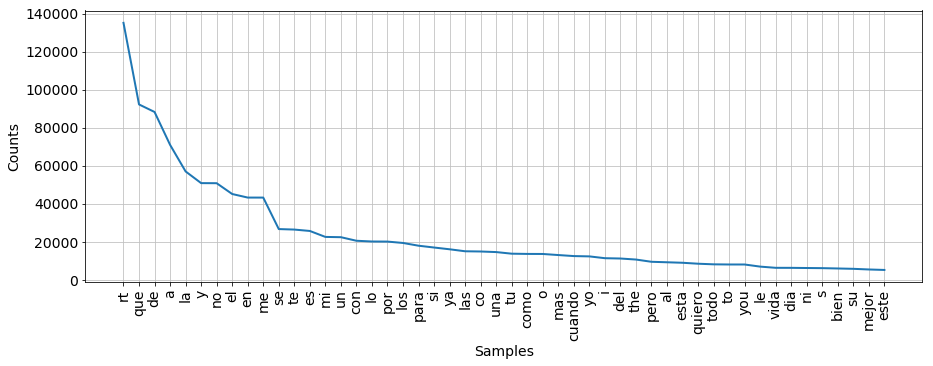

In [73]:
file = open( "token.txt","r" )
anaconda = file.read()
file.close()

anaconda = anaconda.split()
most_common_words = nltk.FreqDist(anaconda)

print( "Cantidad de palabras en el texto: ", most_common_words.N() )
print( "\nPalabras más populares:\n", most_common_words.most_common( 50 ) )

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(15, 5))

most_common_words.plot(50, cumulative=False)



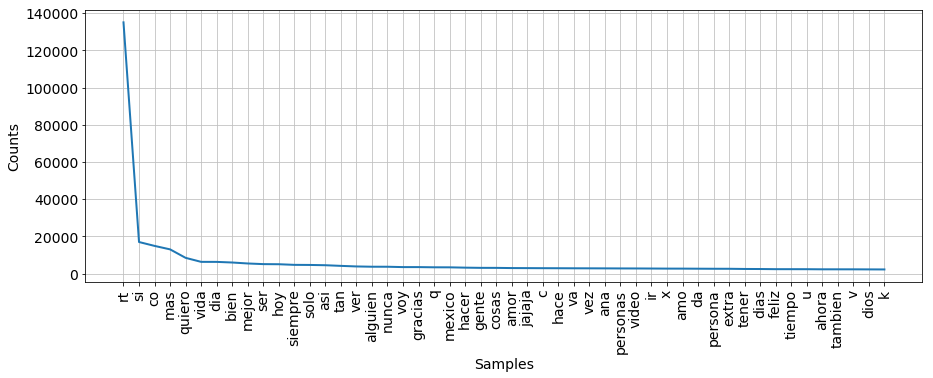

In [74]:
from nltk.corpus import stopwords

sw = set(stopwords.words("spanish"))
anaconda = [w for w in anaconda if not w in sw]

sw = set(stopwords.words("english"))
anaconda = [w for w in anaconda if not w in sw]

most_common_words = nltk.FreqDist( anaconda )

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)


### Ya que tenemos nuestros datos limpios continuamos aguardarlos en en otro archivo txt para poder hacerles los analisis adecuados.

In [75]:
txt = open( "token_limpios.txt","w" )

for token in anaconda:
    if len(token) > 1 and token != "i":
        txt.write( token+" " )

        
txt.close()